## Задание 2

Дан датасет eplleaguetables.csv, в котором представлены все итоговые таблицы команд сезонов 2010/2011 - 2019/2020 Английской Премьер Лиги. Необходимо с помощью правильно подобранной наглядной визуализации ответить на следующие вопросы.

Наглядно на одном графике изобразите обобщенные показатели распределения очков в зависимости от занятого места.

Т.е. берется место n (от 1 до 20) и кол-ва очков, которые набирали команды, занимавшие место n во всех представленных сезонах - это и есть распределение очков. Выявите с помощью графика те места, где в распределении были явные выбросы.

Описание датасета eplleaguetables.csv:
* Position - итоговое место команды в таблице сезона (от 1 до 20 места)
* Club - название клуба
* Matches - кол-во матчей, сыгранное командой в рамках сезона
* Wins - кол-во побед команды в рамках сезона
* Draws - кол-во ничьих команды
* Losses - кол-во поражений команды
* GoalsScored - кол-во забитых голов командой
* GoalsConceded - кол-во пропущенных голов командой
* GoalDiff - разница между забитыми и пропущенными голами
* Points - кол-во очков команды
* Season - идентификатор сезона (например, 10-11 обозначает сезон 2010/2011)

## Импорты и первичный анализ

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

df = pd.read_csv('eplleaguetables.csv')

In [6]:
df.info()
display(df.describe())
display(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Position       200 non-null    int64 
 1   Club           200 non-null    object
 2   Matches        200 non-null    int64 
 3   Wins           200 non-null    int64 
 4   Draws          200 non-null    int64 
 5   Losses         200 non-null    int64 
 6   GoalsScored    200 non-null    int64 
 7   GoalsConceded  200 non-null    int64 
 8   GoalDiff       200 non-null    int64 
 9   Points         200 non-null    int64 
 10  Season         200 non-null    object
dtypes: int64(9), object(2)
memory usage: 17.3+ KB


,Position,Matches,Wins,Draws,Losses,GoalsScored,GoalsConceded,GoalDiff,Points
count,200.000000,200.0,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,10.500000,38.0,14.320000,9.360000,14.320000,52.165000,52.165000,0.000000,52.320000
std,5.780751,0.0,6.150344,2.940003,5.610256,16.617112,12.814791,26.765499,17.438408
min,1.000000,38.0,3.000000,2.000000,1.000000,22.000000,22.000000,-54.000000,16.000000
25%,5.750000,38.0,10.000000,7.000000,10.000000,41.000000,43.000000,-20.000000,40.000000
50%,10.500000,38.0,12.000000,9.000000,15.000000,48.000000,52.000000,-7.000000,47.000000
75%,15.250000,38.0,19.000000,11.000000,19.000000,62.000000,60.000000,19.250000,64.250000
max,20.000000,38.0,32.000000,17.000000,28.000000,106.000000,85.000000,79.000000,100.000000


,Position,Club,Matches,Wins,Draws,Losses,GoalsScored,GoalsConceded,GoalDiff,Points,Season
0,1,Man Utd,38,23,11,4,78,37,41,80,10-11
1,2,Chelsea,38,21,8,9,69,33,36,71,10-11
2,3,Man City,38,21,8,9,60,33,27,71,10-11
3,4,Arsenal,38,19,11,8,72,43,29,68,10-11
4,5,Tottenham,38,16,14,8,55,46,9,62,10-11
5,6,Liverpool,38,17,7,14,59,44,15,58,10-11
6,7,Everton,38,13,15,10,51,45,6,54,10-11
7,8,Fulham,38,11,16,11,49,43,6,49,10-11
8,9,Aston Villa,38,12,12,14,48,59,-11,48,10-11
9,10,Sunderland,38,12,11,15,45,56,-11,47,10-11


## График "Ящик с усами"

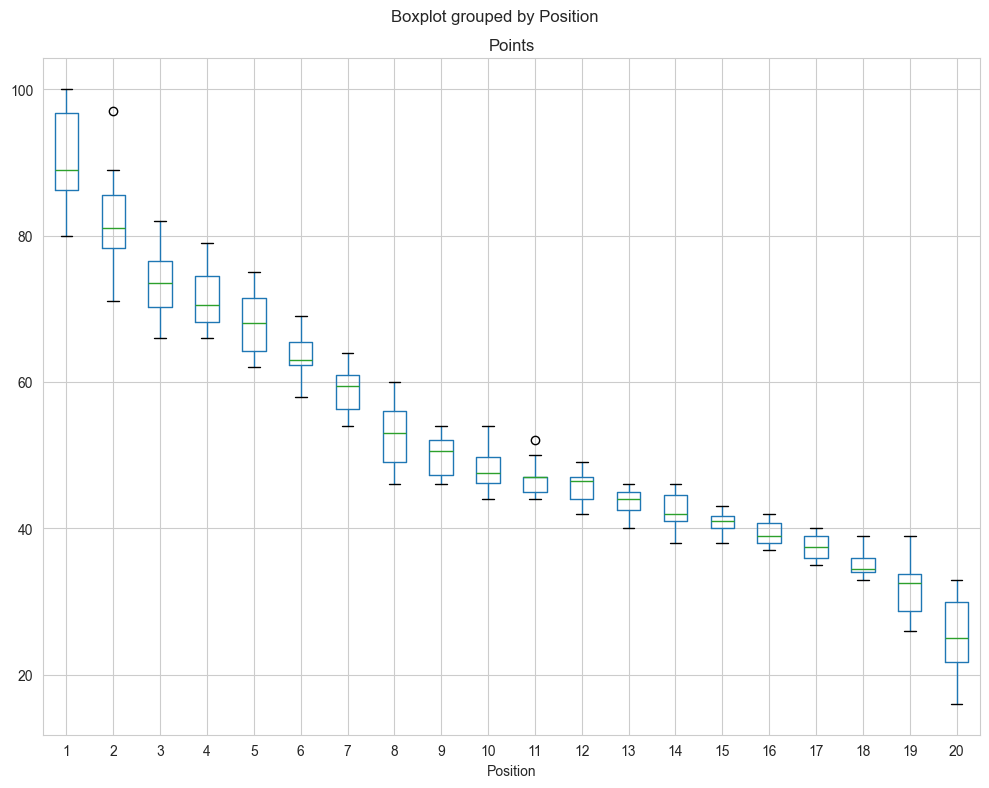

In [31]:
# boxplot = df.boxplot(column=['Points'], by='Season')
boxplot = df.boxplot(column=['Points'], by='Position', figsize=(10, 8), whis=1.5)

fig = boxplot.get_figure()

# plt.title("Duration Histogram")
# plt.xlabel("Duration intervals")
# plt.ylabel("Sessions count")
# plt.legend('')
plt.tight_layout()
fig.savefig('res/2.png', dpi=150)
plt.show()

## Анализ выбросов

In [34]:
lower_df = pd.DataFrame()
upper_df = pd.DataFrame()

for pos in df['Position'].unique():
    sub_df = df[df['Position'] == pos]
    points = np.array(sub_df['Points']) 
    points.sort()

    q1 = np.nanpercentile(points, 25) 
    q2 = np.nanpercentile(points, 50, method='midpoint') 
    q3 = np.nanpercentile(points, 75) 
    IQR = q3 - q1  # 1.5 межквартильных размаха
    lower_limit = q1 - 1.5*IQR
    upper_limit = q3 + 1.5*IQR
    
    print(f'Pos {pos}: (25;50;75)={[q1, q2, q3]}\tIQR={IQR}\tlower={lower_limit}\tupper={upper_limit}') 
    print(f'Points: {points}\n') 
    
    lower_df = pd.concat([lower_df, sub_df.loc[sub_df['Points'] < lower_limit]])
    upper_df = pd.concat([upper_df, sub_df.loc[sub_df['Points'] > upper_limit]])
    

display(lower_df)
display(upper_df)

Pos 1: (25;50;75)=[86.25, 89.0, 96.75]	IQR=10.5	lower=70.5	upper=112.5
Points: [ 80  81  86  87  89  89  93  98  99 100]

Pos 2: (25;50;75)=[78.25, 81.0, 85.5]	IQR=7.25	lower=67.375	upper=96.375
Points: [71 71 78 79 81 81 84 86 89 97]

Pos 3: (25;50;75)=[70.25, 73.5, 76.5]	IQR=6.25	lower=60.875	upper=85.875
Points: [66 70 70 71 72 75 75 77 78 82]

Pos 4: (25;50;75)=[68.25, 70.5, 74.5]	IQR=6.25	lower=58.875	upper=83.875
Points: [66 66 68 69 70 71 73 75 76 79]

Pos 5: (25;50;75)=[64.25, 68.0, 71.5]	IQR=7.25	lower=53.375	upper=82.375
Points: [62 62 64 65 66 70 70 72 72 75]

Pos 6: (25;50;75)=[62.25, 63.0, 65.5]	IQR=3.25	lower=57.375	upper=70.375
Points: [58 59 62 63 63 63 64 66 69 69]

Pos 7: (25;50;75)=[56.25, 59.5, 61.0]	IQR=4.75	lower=49.125	upper=68.125
Points: [54 54 56 57 59 60 61 61 62 64]

Pos 8: (25;50;75)=[49.0, 53.0, 56.0]	IQR=7.0	lower=38.5	upper=66.5
Points: [46 49 49 49 52 54 56 56 56 60]

Pos 9: (25;50;75)=[47.25, 50.5, 52.0]	IQR=4.75	lower=40.125	upper=59.125
Points: [46 4

,Position,Club,Matches,Wins,Draws,Losses,GoalsScored,GoalsConceded,GoalDiff,Points,Season


,Position,Club,Matches,Wins,Draws,Losses,GoalsScored,GoalsConceded,GoalDiff,Points,Season
161,2,Liverpool,38,30,7,1,89,22,67,97,18-19
190,11,Southampton,38,15,7,16,51,60,-9,52,19-20


Таким образом команды _Liverpool (№2 18-19)_ и _Southampton (№11 19-20)_ являются **выбросами** в большую сторону, т.е. набрали много очков для своей позиции в рейтинге